In [1]:
%matplotlib inline

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# Chapter 2

## Easy

**2E1** Which of the expresions below correspond to the statement: *the probability of rain on Monday*?

(1) Pr(rain)

(2) **Pr(rain|Monday)**

(3) Pr(Monday|rain)

(4) **Pr(rain,Monday)/Pr(Monday)**

**2E2** Which of the following statements corresponds to the expression: Pr(Monday|rain)?

(1)  The probability of rain on Monday.

(2)  The probability of rain, given that it is Monday.

(3)  **The probability that it is Monday, given that it is raining.** 

(4)  The probability that it is Monday and that it is raining.


**2E3** Which of the expressions below correspond to the statement: *the probability that it is Monday, given that it is raining*?

(1) **Pr(Monday|rain)**

(2) Pr(rain|Monday)

(3) Pr(rain|Monday)Pr(Monday)

(4) **Pr(rain|Monday)Pr(Monday)/Pr(rain)** 

(5) Pr(Monday|rain)Pr(rain)/Pr(Monday)

**2E4** The Bayesian statistician Bruno de Finetti (1906–1985) began his book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.”  The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What does it mean to say “the probability of water is 0.7”?

*We are certain that there is water*

## Medium

**2M1** Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.

(1) W,W,W

(2) W,W,W,L

(3) L,W,W,L,W,W,W

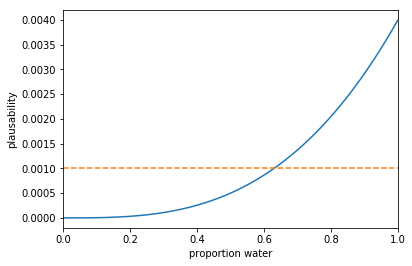

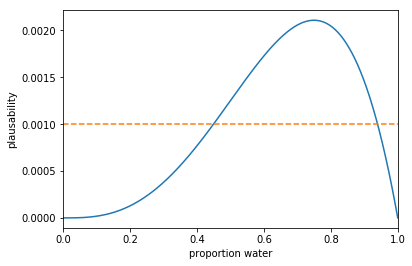

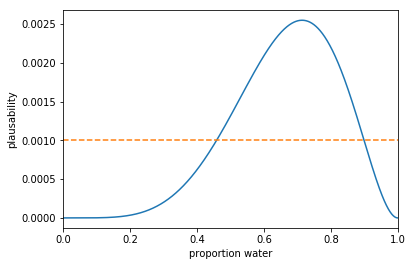

In [2]:
def plot_grid_posterior(nw, n, caption):
    # define grid
    grid = np.arange(0,1.001,0.001)
    # define prior
    prior = np.ones(grid.shape[0])
    # compute likelihood at each value in grid
    likelihood = scipy.stats.binom.pmf(k=nw, n=n, p=grid)
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / sum(unstd_posterior)
    # Plotting
    #   posterior is the continuous line
    #   prior is the dashed line
    fig, ax = plt.subplots()
    ax.plot(grid, posterior)
    ax.plot(grid, prior/np.sum(prior), '--')
    ax.set_xlabel('proportion water')
    ax.set_ylabel('plausability')
    ax.set_xlim([0,1])
    
plot_grid_posterior(3,3,'WWW')
plot_grid_posterior(3,4,'WWWL')
plot_grid_posterior(5,7,'LWWLWWW')

**2M2** Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

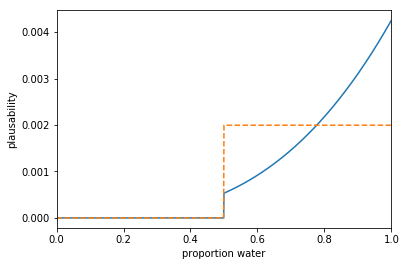

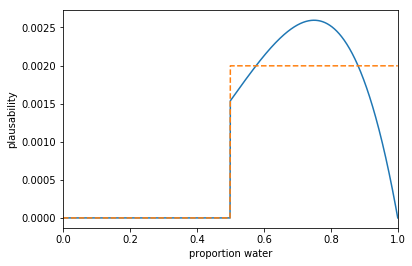

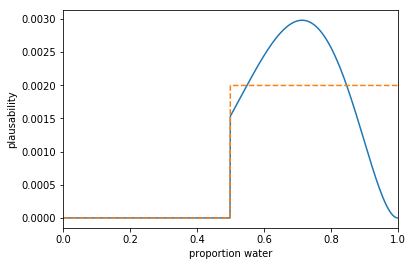

In [3]:
def plot_grid_posterior(nw, n, caption):
    # define grid
    grid = np.arange(0,1.001,0.001)
    # define prior
    prior = np.ones(grid.shape[0])
    prior[0:int(prior.shape[0]/2)] = 0
    # compute likelihood at each value in grid
    likelihood = scipy.stats.binom.pmf(k=nw, n=n, p=grid)
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / sum(unstd_posterior)
    # Plotting
    #   posterior is the continuous line
    #   prior is the dashed line
    fig, ax = plt.subplots()
    ax.plot(grid, posterior)
    ax.plot(grid, prior/np.sum(prior), '--')
    ax.set_xlabel('proportion water')
    ax.set_ylabel('plausability')
    ax.set_xlim([0,1])
    
plot_grid_posterior(3,3,'WWW')
plot_grid_posterior(3,4,'WWWL')
plot_grid_posterior(5,7,'LWWLWWW')

**2M3** Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes — you don’t know which — was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23.

In [4]:
# Earth, Mars
likelihood = np.array([0.3, 1])
prior = np.array([0.5, 0.5])
posterior = likelihood*prior/np.sum(likelihood*prior)
print(posterior)

[ 0.23076923  0.76923077]


**2M4** Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it  at on a table. A black side is shown facing up, but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).

|Conjecture|p|Prior|Ways to produce B|Product
|:-------------:|:-------------:|:-------------:|:-------------:|
|WW|0  |1|0|0|
|BW|0.5|1|1|1|
|BB|1  |1|2|2|
   
P(BB|B) = ways BB can produce B x prior(BB) / sum of products = 2 x 1 / 3 = 2/3

**2M5** Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

|Conjecture|p|Prior|Ways to produce B|Product|
|:-------------:|:-------------:|:-------------:|:-------------:|
|WW|0  |1|0|0
|BW|0.5|1|1|1
|BB|1  |2|2|4
   
P(BB|B) = ways BB can produce B x prior(BB) / sum of products = 2 x 2 / 5 = 4/5

**2M6** Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method, as before.

|Conjecture|p|Prior|Ways to produce B|Product|
|:-------------:|:-------------:|:-------------:|:-------------:|
|WW|0  |3|0|0
|BW|0.5|2|1|2
|BB|1  |1|2|2
   
P(BB|B) = ways BB can produce B x prior(BB) / sum of products = 2 x 1 / 4 = 0.5

**2M7** Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

|Conjecture|p|Prior|Ways to produce B|Product|
|:-------------:|:-------------:|:-------------:|:-------------:|
|WW|0  |0|1|0
|BW|0.5|1|2|2
|BB|1  |2|3|6

P(first card is BB|observed BW) = ways to obtain W in the second card if the first is BB x prior(BB) given the first observation was B / sum of products = 3 x 2 / 8 = 0.75

## Hard

**2H1** Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places.  They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

In [5]:
likelihood = np.array([0.1, 0.2])
prior = np.array([0.5, 0.5])
posterior = likelihood * prior / np.sum(likelihood * prior) # Probability first birth is twins

print(np.sum(posterior * likelihood))

0.166666666667


**2H2** Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

In [6]:
likelihood = np.array([0.1, 0.2])
prior = np.array([0.5, 0.5])
posterior_species = likelihood*prior/np.sum(likelihood*prior)
print('p(A) = ' + str(posterior_species[0])) 
print('p(B) = ' + str(posterior_species[1]))

p(A) = 0.333333333333
p(B) = 0.666666666667


**2H3** Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

In [7]:
likelihood = np.array([0.9, 0.8])
prior = posterior_species
posterior_species = likelihood*prior/np.sum(likelihood*prior)
print('p(A) = ' + str(posterior_species[0])) 
print('p(B) = ' + str(posterior_species[1]))

p(A) = 0.36
p(B) = 0.64


**2H4** A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.

So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect.  is is the information you have about the test:

* The probability it correctly identfies a species A panda is 0.8. 
* The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well.

In [8]:
likelihood_test = np.array([0.8, 0.35])
prior = np.array([0.5, 0.5])
posterior_species = likelihood*prior/np.sum(likelihood_test*prior)
print('p(A) = ' + str(posterior_species[0])) 
print('p(B) = ' + str(posterior_species[1]))
print()
likelihood_twins = np.array([0.1, 0.2])
prior = posterior_species
posterior_species = likelihood_twins*prior/np.sum(likelihood_twins*prior)
print('p(A) = ' + str(posterior_species[0])) 
print('p(B) = ' + str(posterior_species[1]))
print()
likelihood_singleton = np.array([0.9, 0.8])
prior = posterior_species
posterior_species = likelihood_singleton*prior/np.sum(likelihood_singleton*prior)
print('p(A) = ' + str(posterior_species[0])) 
print('p(B) = ' + str(posterior_species[1]))
print()

p(A) = 0.782608695652
p(B) = 0.695652173913

p(A) = 0.36
p(B) = 0.64

p(A) = 0.387559808612
p(B) = 0.612440191388

